Name: T R Hari Subramaniam

Roll: AM.EN.U4CSE19056

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset_url = 'https://www.kaggle.com/bingazuran/nsfwsfwdataset2'

In [ ]:
!pip install jovian opendatasets --upgrade --quiet
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./nsfwsfwdataset2" (use force=True to force download)


In [ ]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
import torchvision.transforms as transforms
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [ ]:
data_dir = './nsfwsfwdataset2/NSFW-FSW-Dataset-Omar-3'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['train', 'test']
['sfw', 'nsfw']


In [ ]:
transform_train = transforms.Compose([
    transforms.Resize(224),
    transforms.RandomResizedCrop(224), 
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

transform_test = transforms.Compose([
    transforms.Resize(224),
    transforms.RandomResizedCrop(224), 
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [ ]:
trainset = ImageFolder(data_dir+'/train', transform=transform_train)
testset = ImageFolder(data_dir+'/test', transform=transform_test)

In [ ]:
trainset

Dataset ImageFolder
    Number of datapoints: 5000
    Root location: ./nsfwsfwdataset2/NSFW-FSW-Dataset-Omar-3/train
    StandardTransform
Transform: Compose(
               Resize(size=224, interpolation=bilinear, max_size=None, antialias=None)
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [ ]:
batch_size = 16
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

In [ ]:
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True)

In [ ]:
img, label = trainset[0]
print(img.shape, label)
img

torch.Size([3, 224, 224]) 0


tensor([[[-0.7255, -0.7255, -0.7176,  ...,  0.5765,  0.5608,  0.5451],
         [-0.7020, -0.7020, -0.7020,  ...,  0.5529,  0.5451,  0.5373],
         [-0.6784, -0.6784, -0.6784,  ...,  0.5373,  0.5373,  0.5373],
         ...,
         [-0.0275, -0.0196, -0.0039,  ..., -0.0980, -0.0980, -0.0980],
         [ 0.0431,  0.0667,  0.0824,  ..., -0.1529, -0.1451, -0.1451],
         [ 0.1216,  0.1451,  0.1608,  ..., -0.1922, -0.1843, -0.1843]],

        [[-0.9137, -0.9137, -0.9059,  ..., -0.0824, -0.1059, -0.1294],
         [-0.9059, -0.9059, -0.9059,  ..., -0.1059, -0.1137, -0.1294],
         [-0.8980, -0.8980, -0.8980,  ..., -0.1216, -0.1216, -0.1216],
         ...,
         [-0.4588, -0.4196, -0.3804,  ..., -0.6157, -0.6157, -0.6157],
         [-0.2784, -0.2471, -0.2157,  ..., -0.6549, -0.6549, -0.6549],
         [-0.1137, -0.0902, -0.0745,  ..., -0.6784, -0.6784, -0.6784]],

        [[-0.9451, -0.9451, -0.9373,  ..., -0.3490, -0.3804, -0.4039],
         [-0.9373, -0.9373, -0.9294,  ..., -0

In [ ]:
from torchsummary import summary

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
from torchvision import models
batch_size = 16

In [ ]:
!git clone https://github.com/lukemelas/EfficientNet-PyTorch
!cd EfficientNet-Pytorch
!pip install -e .
!pip install efficientnet_pytorch

fatal: destination path 'EfficientNet-PyTorch' already exists and is not an empty directory.
/bin/bash: line 0: cd: EfficientNet-Pytorch: No such file or directory
ERROR: File "setup.py" or "setup.cfg" not found. Directory cannot be installed in editable mode: /content


In [ ]:
#vgg = models.vgg16_bn(pretrained=True)
from efficientnet_pytorch import EfficientNet
effNet = EfficientNet.from_pretrained('efficientnet-b0')   #Intialising efficientnet-b0.

Loaded pretrained weights for efficientnet-b0


In [ ]:
effNet._fc

Linear(in_features=1280, out_features=1000, bias=True)

In [ ]:
import torch.nn as nn
num_classes = 2
class EfficientNet_b0(nn.Module):
    def __init__(self):
        super(EfficientNet_b0, self).__init__()
        self.model =EfficientNet.from_pretrained('efficientnet-b0')       # Give variant as per requirement
        
        self.model._fc = nn.Sequential(
            nn.Linear(self.model._fc.in_features, num_classes)                                              # Required if training with NLLLoss
        )
        
    def forward(self, x):
        out = self.model(x)
        return out

In [ ]:
effNet = EfficientNet_b0()   # Initialsing an object of the class.

Loaded pretrained weights for efficientnet-b0


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
effNet = effNet.to('cuda')    # Load the model to GPU.

In [ ]:
opt = optim.Adam(effNet.parameters())   
loss_fn = nn.CrossEntropyLoss()                           

In [ ]:
def evaluation(dataloader, model):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

Iteration: 0/313, Loss: 0.75
Iteration: 100/313, Loss: 0.12
Iteration: 200/313, Loss: 0.40
Iteration: 300/313, Loss: 0.32
Epoch: 0/5, Test acc: 89.40, Train acc: 88.52
Iteration: 0/313, Loss: 0.14
Iteration: 100/313, Loss: 0.24
Iteration: 200/313, Loss: 0.08
Iteration: 300/313, Loss: 0.16
Epoch: 1/5, Test acc: 87.60, Train acc: 90.18
Iteration: 0/313, Loss: 0.49
Iteration: 100/313, Loss: 0.12
Iteration: 200/313, Loss: 0.23
Iteration: 300/313, Loss: 0.39
Epoch: 2/5, Test acc: 87.60, Train acc: 90.62
Iteration: 0/313, Loss: 0.26
Iteration: 100/313, Loss: 0.32
Iteration: 200/313, Loss: 0.61
Iteration: 300/313, Loss: 0.07
Epoch: 3/5, Test acc: 89.00, Train acc: 91.90
Iteration: 0/313, Loss: 0.45
Iteration: 100/313, Loss: 0.40
Iteration: 200/313, Loss: 0.09
Iteration: 300/313, Loss: 0.12
Epoch: 4/5, Test acc: 89.70, Train acc: 91.84


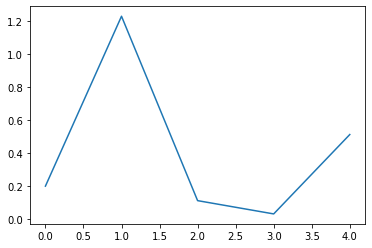

In [ ]:
loss_epoch_arr = []
max_epochs = 5

n_iters = np.ceil(5000/batch_size)

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = effNet(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        del inputs, labels, outputs
        torch.cuda.empty_cache()
        
        if i % 100 == 0:
            print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (
        epoch, max_epochs, 
        evaluation(testloader, effNet), evaluation(trainloader, effNet)))
    
plt.plot(loss_epoch_arr)
plt.show()

In [ ]:
test_train = [[88.52, 89.40], [ 90.18, 87.60], [ 90.62, 87.60], [ 91.90, 89.00], [91.84, 89.70]]

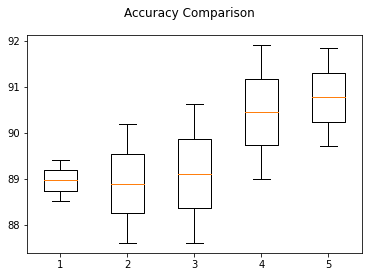

In [ ]:
epoch = [1,2,3,4,5]
fig = plt.figure();
fig.suptitle('Accuracy Comparison');
ax = fig.add_subplot(111);
plt.boxplot(test_train);
ax.set_xticklabels(epoch);
plt.show();

In [ ]:
train_accuracy = [88.52, 90.18, 90.62, 91.90, 91.84] 
test_accuracy = [89.40, 87.60, 87.60, 89.00, 89.70] 

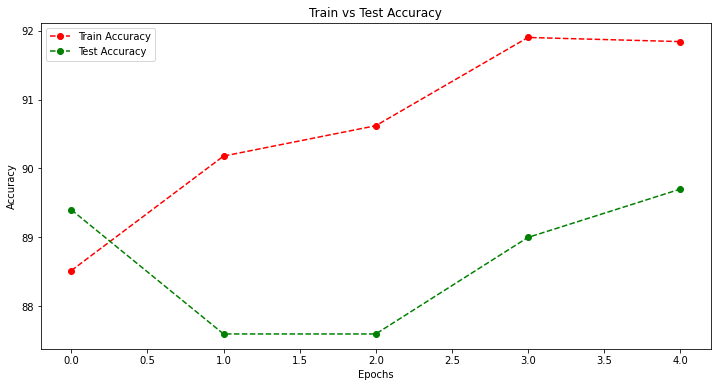

In [ ]:
plt.figure(figsize=(12,6));
plt.plot(train_accuracy, 'o--r');
plt.plot(test_accuracy,'o--g');
plt.xlabel('Epochs');
plt.ylabel('Accuracy');
plt.title('Train vs Test Accuracy');
plt.legend(['Train Accuracy','Test Accuracy']);

In [ ]:
sum(test_accuracy)/len(test_accuracy)

88.66

In [ ]:
testlist = [86.9,89.88,90.66,90.26,88.72]
sum(testlist)/len(testlist)

89.28399999999999

In [ ]:
testlist = [88.74,89.18,90.38,90.86,90.66]
sum(testlist)/len(testlist)

89.96400000000001